## Validate MOAST methodology in all forms and all steps for TargetMol

In [1]:
#!/usr/bin/env python
import pandas as pd, numpy as np
from MOAST import Build, GenSimMats
import pyarrow as pa
import os, sys


So we will be 'testing' or 'validating' by building and running the method with TargetMol noPMA and PMA+noPMA datasets.

specifically we will be using the UMAP_noPMA_longtrain_full and UMAP_PMA+noPMA_horiztrain_full datasets, which both should have a similar shape of (~20730, 100)


we'll be prioritizing the output of the following classes:

- STAT
- VKOR
- PAR
- Glucokinase
- Ras
- HMG-CoA_Reductase
- DUB
- TNF
- COX
- AURK
- Glucocorticoid_Receptor


In [10]:
annots = os.path.abspath("D:/Akshar/ScottLokeyLab/TargetMol-CP3/TargetMol-CP3/KStest_py_20240125_FeatReductions/reducedKey_cytoscapeAnnot.xlsx")

noPMA_ref = os.path.abspath("D:/Akshar/ScottLokeyLab/TargetMol-CP3/TargetMol-CP3/FrozenVersions/TargetMol_1uM+10uM_noPMA_HD_longconcat_UMAPreduced.csv")

PMA_noPMA_ref = os.path.abspath("D:/Akshar/ScottLokeyLab/TargetMol-CP3/TargetMol-CP3/FrozenVersions/TargetMol_1-27_1uM+10uM_PMA+noPMA_HD_horizconcat-dropna_UMAPreduced.csv")

plateSimMat_reportDir = os.path.abspath("B:/TM_FeatReports_MOAST")
target_MOAST_output_dir = os.path.abspath("B:/MOAST_validationTest")

In [11]:
# Read in the relevant files
annotsDF = pd.read_excel(annots, sheet_name="reducedKey")
noPMA_refDF = pd.read_csv(noPMA_ref,engine="pyarrow",index_col=0)
display(annotsDF.columns, noPMA_refDF.shape)


Index(['IDname', 'TM_ID', 'Concentration', 'Well', 'Plate', 'IDname_short',
       'Refined_Acronym', 'AL_CONSOLIDATED', 'Name', 'TM_Target',
       'TM_Pathways', 'GPT4-FunctionalClass', 'GPT4-KEGG', 'GPT4-Target'],
      dtype='object')

(20734, 100)

In [12]:
# build the class KDEdict
b = Build(dataset=noPMA_refDF,
        # nullData=testNullData,
        classesDf=annotsDF,
        on="IDname",
        classesCol="AL_CONSOLIDATED",
    )
refDict = b.build()

c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman

In [14]:
display(list(refDict.items())[:5])

[('1,3-beta-D-glucan_synthase',
  (array([-0.02360533, -0.02353446, -0.02346359, ...,  1.44552368,
           1.44559455,  1.44566542]),
   array([ 2.22044605e-16,  2.22044605e-16,  4.01456646e-17, ...,
           7.04621546e-17, -9.90614997e-16,  3.53416062e-16]))),
 ('3C-like_protease_(3CLpro)_of_coronaviruses',
  (array([-0.0707899 , -0.07071478, -0.07063967, ...,  1.48643764,
           1.48651275,  1.48658787]),
   array([-2.76322175e-19,  4.64576525e-16,  5.45420499e-16, ...,
          -1.21293592e-15, -2.83230229e-16, -8.89560031e-16]))),
 ('4-hydroxyphenylpyruvate_dioxygenase',
  (array([-0.07204936, -0.07197291, -0.07189645, ...,  1.5128836 ,
           1.51296006,  1.51303651]),
   array([-2.74738318e-17, -2.74738318e-17,  3.05217417e-16, ...,
           5.33942651e-16, -2.74738318e-17,  7.64921835e-17]))),
 ('5-ASA',
  (array([-0.07300913, -0.0729365 , -0.07286387, ...,  1.43271414,
           1.43278677,  1.4328594 ]),
   array([1.15326824e-09, 8.83649995e-09, 1.18821572e-0

 for sanity check, we'll plot the reference KDEs for each class

In [23]:
import matplotlib.pyplot as plt, seaborn as sns, scipy as sp, statsmodels as sm
def sanitizeNames(name):
    return name.replace("/","_").replace("(","").replace(")","").replace(',','_')

for consolClass,(kde_support,kde_pdf) in refDict.items():
    plt.plot(kde_support,kde_pdf)
    plt.title(consolClass)
    # plt.show()
    plt.savefig(os.path.join(target_MOAST_output_dir,sanitizeNames(consolClass)+".png"))
    plt.close()

Lets look at the specific classes we want to highlight

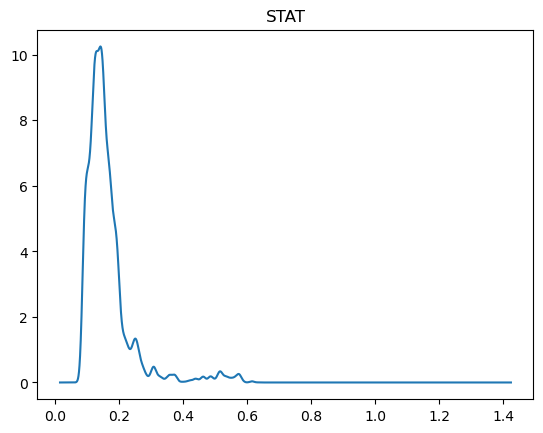

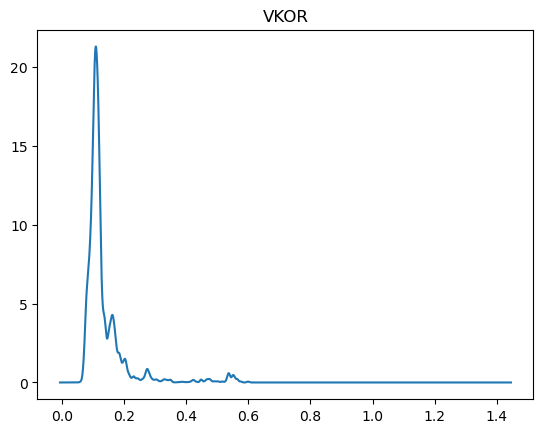

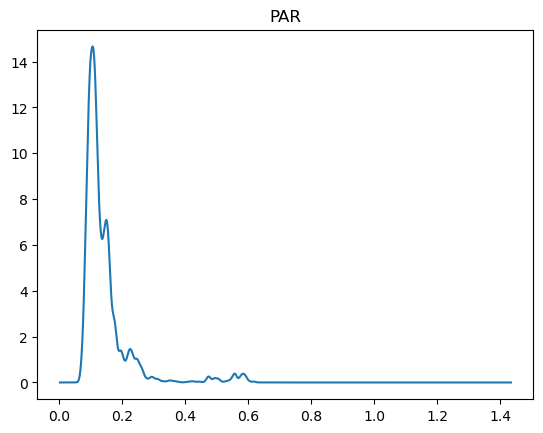

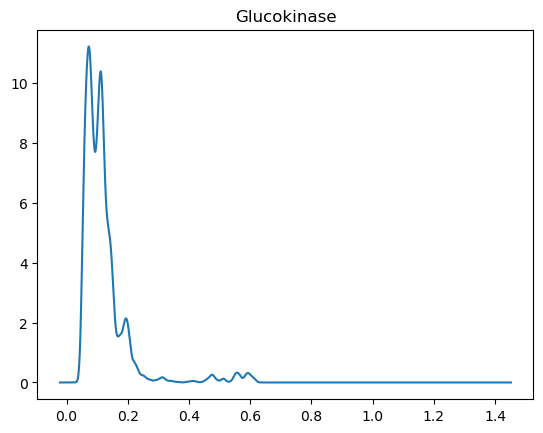

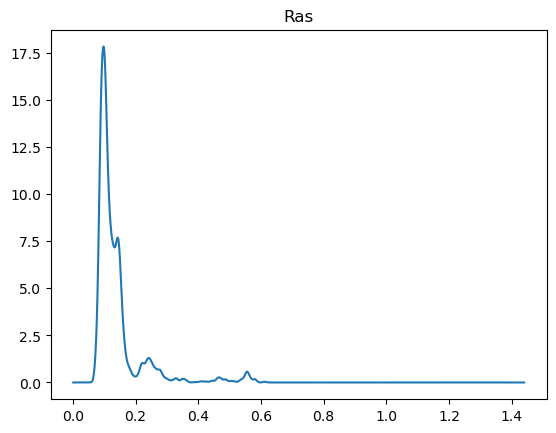

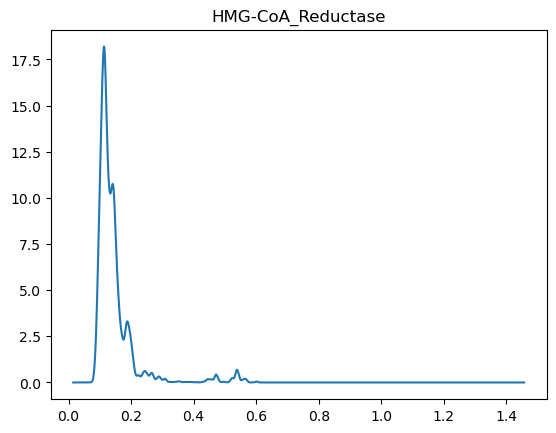

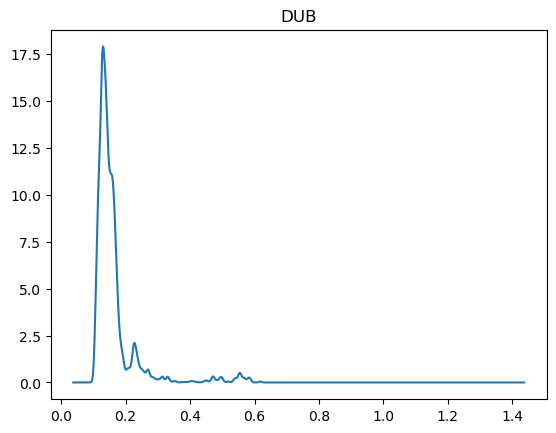

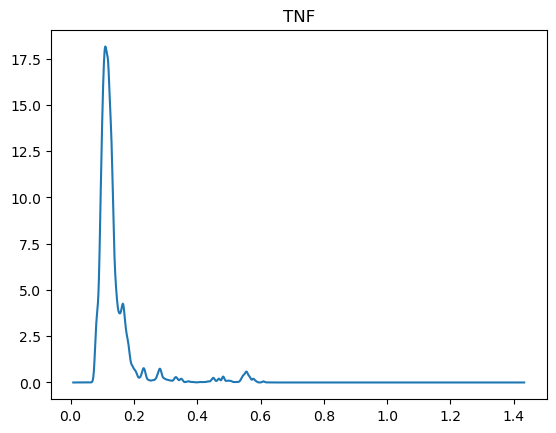

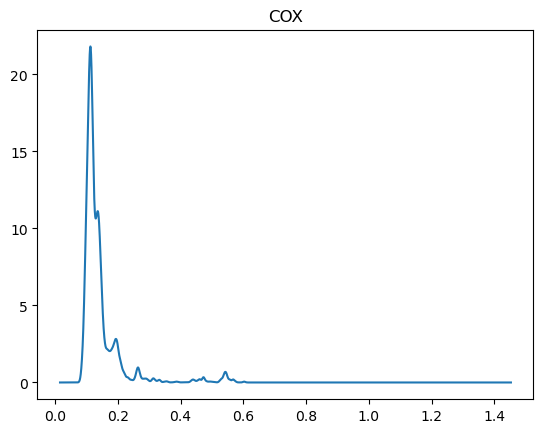

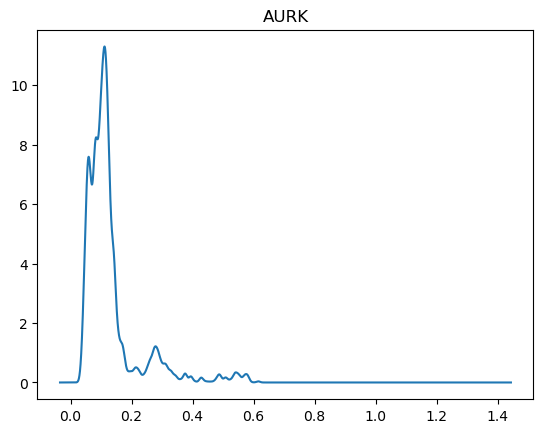

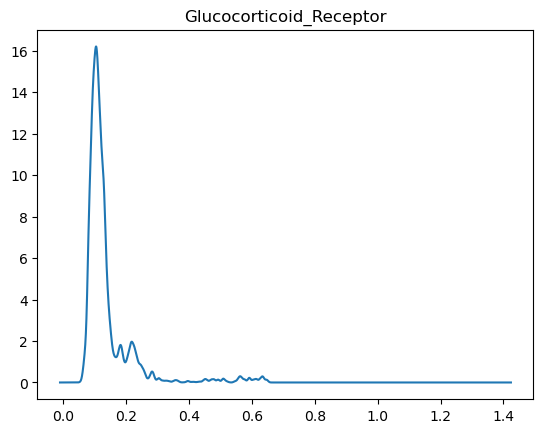

In [25]:
for consolClass in "- STAT- VKOR- PAR- Glucokinase- Ras- HMG-CoA_Reductase- DUB- TNF- COX- AURK- Glucocorticoid_Receptor".split('- '):
    if consolClass != '':
        kde_support, kde_pdf = refDict[consolClass]
        plt.plot(kde_support, kde_pdf)
        plt.title(consolClass)
        plt.show()
        # plt.savefig(
        #     os.path.join(target_MOAST_output_dir, sanitizeNames(consolClass) + ".png")
        # )
        plt.close()